# Sktime mini-Homework

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/bigdata/miniHW

/content/drive/MyDrive/Colab Notebooks/bigdata/miniHW


## 資料集介紹:
* __3650筆__澳洲墨爾本的每日最低溫
* 從1981年1月1日連續紀錄到1990年12月31日

## 作業目標:
1. 建立一個時間序列的模型
2. 損失函數至少達到__0.09__以下
3. 加上95%信心水準並畫出其時間序列圖

### (1) 載入資料與前處理
1. 將日期中的月份挑選出來，並使其型態轉換成datetime
2. 再將每日最低溫的型態轉換成float
3. 透過groupby()以date為依據進行分組
4. 取平均後可得到我們想要的資料(平均每月最低溫)
5. 把資料的index轉換成period型態

In [9]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 6.5MB/s 
     |████████████████████████████████| 2.1MB 45.0MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [10]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.all import *
from sklearn.metrics import accuracy_score
from sktime.performance_metrics.forecasting import smape_loss
import matplotlib as plt
import pandas as pd
import datetime

In [11]:
df = pd.read_csv("daily-minimum-temperatures.csv")
df["month"] = [str(i)[:str(i).rfind("/")] for i in df["Date"]]
date = pd.to_datetime(df['month'], infer_datetime_format=True)
df["Daily minimum temperatures(average)"] = [float(i) for i in df.iloc[:,1]]
data = df["Daily minimum temperatures(average)"].groupby(date).mean()
data.index = data.index.to_period("M")

* train data有90筆          
* test data有30筆  

In [12]:
train, test = temporal_train_test_split(data)
len(train), len(test)

(90, 30)

* train data和test data都是浮點數的時間序列資料

In [13]:
train.head()

month
1981-01    17.712903
1981-02    17.678571
1981-03    13.500000
1981-04    12.356667
1981-05     9.490323
Freq: M, Name: Daily minimum temperatures(average), dtype: float64

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f038945a668>)

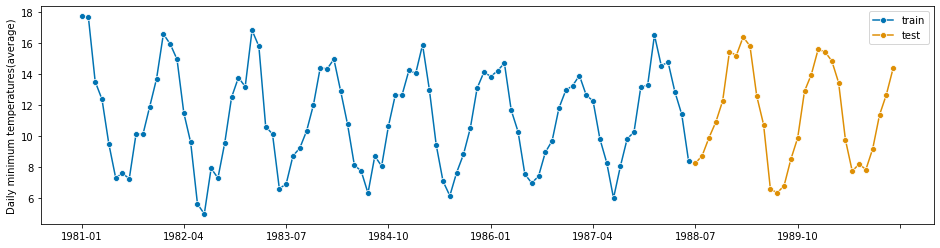

In [14]:
plot_series(train, test, labels=["train", "test"])

### (2) 建立時間序列模型

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA(sp = 12)
forecaster.fit(train)

AutoARIMA(sp=12)

### (3) 畫時間序列圖

In [20]:
fh = np.arange(len(test)) + 1
pred, pred_int = forecaster.predict(fh, return_pred_int=True)
smape_loss(test, pred)

0.08602896847951616

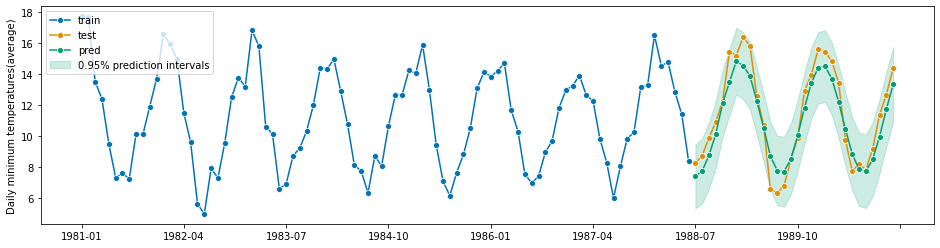

In [21]:
alpha = 0.05  # 95% prediction intervals
fig, ax = plot_series(train, test, pred, labels=["train", "test", "pred"])
ax.fill_between(ax.get_lines()[-1].get_xdata(), pred_int["lower"], pred_int["upper"],
                alpha=0.2, color=ax.get_lines()[-1].get_c(), label=f"{1 - alpha}% prediction intervals")
ax.legend()

![sktime.png](attachment:sktime.png)